In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from models.MigrationSIR import MigrationSIR

% matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [7]:
def generateModelledGraph(N, t, dt, beta, gamma, nodesNumber, nDeviation=100, betaDeviation=0, gammaDeviation=0):
    import random
    G = nx.DiGraph()
    for i in range(1, nodesNumber + 1):
        n = N + random.randrange(-nDeviation, nDeviation)
        mBeta = beta + random.uniform(-betaDeviation, betaDeviation) if betaDeviation != 0 else beta
        mGamma = gamma + random.uniform(-gammaDeviation, gammaDeviation) if gammaDeviation != 0 else gamma
        SIR = [0, int(n * (random.randrange(10, 15) / 100)), 0]
        SIR[0] = n - SIR[1]
        G.add_node(i, model=MigrationSIR(SIR, t, dt, n, mBeta, mGamma))
    return G

In [8]:
N = 1000
beta, gamma = .2, .1
t = 160  #Дни
dt = 1
citiesNum = 4

G = generateModelledGraph(N, t, dt, beta, gamma, citiesNum, 500, .1, .05)

In [ ]:
G.add_edge()

In [20]:
for i in G.nodes:
    G.nodes[i]['model'].runSimulation()
    G.add_node(i, data=(G.nodes[i]['model'].S, G.nodes[i]['model'].I, G.nodes[i]['model'].R))

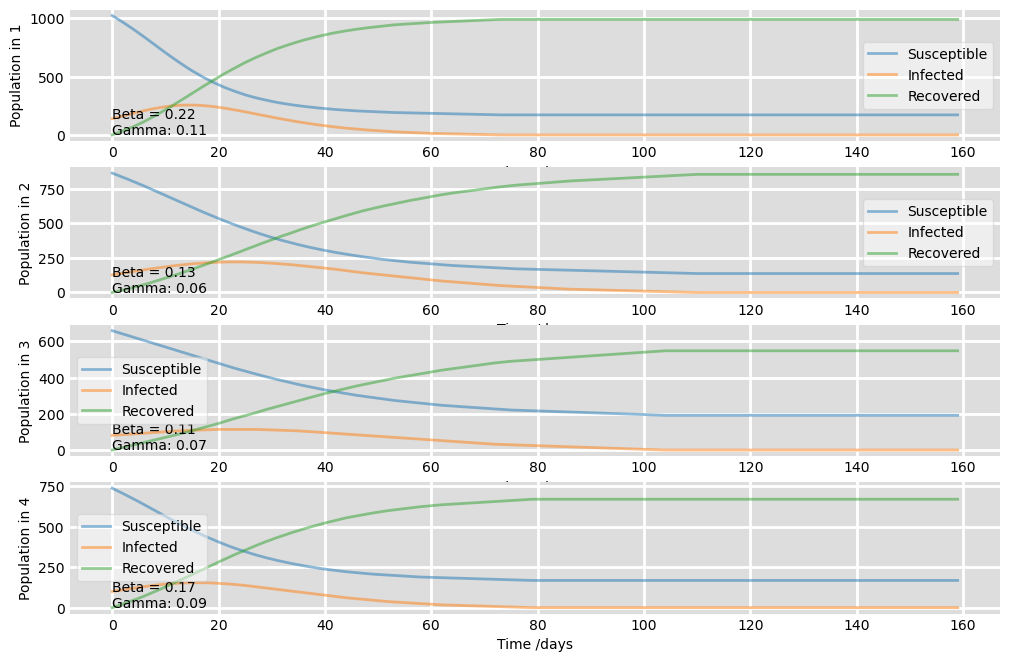

In [27]:
fig = plt.figure(facecolor='white')
time = [i for i in range(t)]
for i in G.nodes:
    S, I, R = G.nodes[i]['data']
    ax = fig.add_subplot(int(f'41{i}'), facecolor='#dddddd', axisbelow=True)
    ax.plot(time, S, alpha=0.5, lw=2, label='Susceptible')
    ax.plot(time, I, alpha=0.5, lw=2, label='Infected')
    ax.plot(time, R, alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel(f'Population in {i}')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.text(0, 0, f"Beta = {G.nodes[i]['model'].beta:.2f}\nGamma: {G.nodes[i]['model'].gamma:.2f}")
    ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)